# Convolutional Neural Networks: A Comprehensive Guide





## 1. Introduction

In the realm of machine learning, Convolutional Neural Networks (CNNs) are powerful models designed for processing image data. 
They excel at tasks such as image classification, object detection, and segmentation.

## 2. Convolutional Layer

### Explanation
The convolutional layer is the core building block of a CNN. It applies a filter (or kernel) to the input image to create feature maps.

### How It Works
- The filter slides over the image, performing element-wise multiplication and summing the results to produce a single value in the output feature map.
- Multiple filters are applied to create multiple feature maps.

#### Consider the following
### Input Image:
- The 4x4 matrix representing the image.
### Filters (Kernels): 
- Sample filter for convolution.
### Convolution Function: 
- A function to perform the convolution operation.

  ![Convolution Process](https://coolgpu.github.io/coolgpu_blog/assets/images/Conv2d_0p_1s_1inCh.gif)



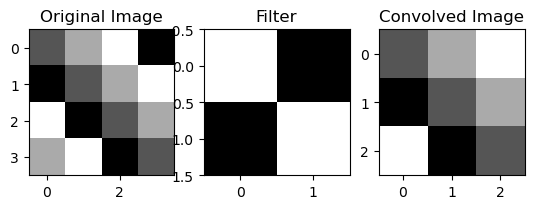

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Sample input image (4x4)
image = np.array([[1, 2, 3, 0],
                  [0, 1, 2, 3],
                  [3, 0, 1, 2],
                  [2, 3, 0, 1]])

# Sample filter (2x2)
filter = np.array([[1, 0],
                   [0, 1]])

# Perform convolution
convolved_image = convolve2d(image, filter, mode='valid')

# Visualizing the images
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Filter")
plt.imshow(filter, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Convolved Image")
plt.imshow(convolved_image, cmap='gray')
plt.show()


#### Insights on Convolution Result: 
- The convolution is performed with the filter [[1, 0], [0, 1]], which essentially adds the pixel values from the original image diagonally. 
- The output of the convolution will be a smaller matrix (in this case, a 3x3 matrix) containing sums of the overlapping values.
#### Highlights - Convolution
- The convolutional layer is the core building block of a CNN. 
- It applies a filter (or kernel) to the input image to create feature maps.
- The filter slides over the image, performing element-wise multiplication and summing the results to produce a single value in the output feature map.
- Multiple filters are applied to create multiple feature maps.

## 3. Stride in Convolutional Neural Networks
- Stride is the number of pixels by which the filter moves across the input image during the convolution operation.
### Key Points:
##### Stride Values:
- Stride = 1: Moves one pixel at a time (retains more detail).
- Stride = 2: Moves two pixels at a time (reduces output size).

#### Impact on Output Dimensions:
- Larger strides decrease the size of the output feature map.
- Formula for output dimensions: O = ( (n + 2p - k) / s ) + 1 
- n = input size, p = padding, k = filter size, s = stride

- Smaller Stride: More spatial information retained, larger output size.
- Larger Stride: Faster processing, smaller output size, potential loss of detail.

- Stride is a crucial parameter that influences both the size of the output feature map and the retention of spatial information.
- Adjusting stride is essential for optimizing CNN performance. If you need further details, let me know!

## 4. Activation Function
### Explanation
- Activation functions introduce non-linearity to the model, enabling it to learn complex patterns.
- The list of activation functions with their use cases and key characteristics:
##### Sigmoid
-  Use Case: Binary classification.
- Characteristics: Outputs range between 0 and 1; suffers from vanishing gradient problem.
##### Tanh
- Use Case: Hidden layers in neural networks.
- Characteristics: Outputs range between -1 and 1; zero-centered, but can also suffer from vanishing gradients.
##### ReLU (Rectified Linear Unit)
- Use Case: Hidden layers in deep networks.
- Characteristics: Outputs zero for negative inputs; computationally efficient; can suffer from "dying ReLU."
##### Leaky ReLU
- Use Case: Hidden layers (to mitigate dying ReLU).
- Characteristics: Allows a small gradient when input is negative; helps keep neurons active.
##### Parametric ReLU (PReLU)
- Use Case: Hidden layers with learnable parameters.
- Characteristics: Similar to Leaky ReLU, but 
##### Softmax
- Use Case: Multi-class classification output layer.
- Characteristics: Converts logits into probabilities that sum to 1; useful for interpreting outputs as class probabilities.
##### GELU (Gaussian Error Linear Unit)
- Use Case: Advanced architectures (e.g., Transformers).
- Characteristics: Combines properties of ReLU and dropout; smoother non-linearities.

### The Rectified Linear Unit (ReLU) is the most commonly used activation function in CNNs.
### How It Works
- ReLU outputs the input directly if it is positive; otherwise, it outputs zero. 
- This helps in accelerating the convergence of stochastic gradient descent.

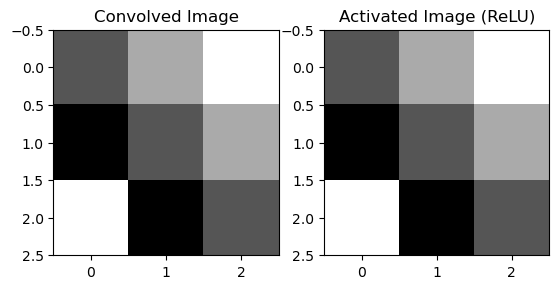

In [59]:
def relu(x):
    return np.maximum(0, x)

# Apply ReLU activation
activated_image = relu(convolved_image)

# Visualizing the activation
plt.subplot(1, 2, 1)
plt.title("Convolved Image")
plt.imshow(convolved_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Activated Image (ReLU)")
plt.imshow(activated_image, cmap='gray')
plt.show()

 - The convolved image and activated image appear the same because of the specific values in your convolution and the nature of the ReLU activation function.
##### ReLU Activation: 
- The ReLU function is defined as relu(x) = np.maximum(0, x).
- It sets all negative values to zero while leaving positive values unchanged.
 ![ReLU](https://mri-q.com/uploads/3/4/5/7/34572113/relu-only-graph_orig.png)
 - Given that the values in the convolved image are all non-negative, applying ReLU won’t change any values.
 - Therefore, if the convolved image has no negative values, the activated image will look identical to the convolved image.

#### The effect of ReLU
- If you want to see the effect of ReLU, consider using a filter that can produce negative values in the convolved output. 
- For instance, using a filter with negative coefficients can help demonstrate how ReLU modifies the output.

## 5. Pooling Layer
- The pooling layer reduces the spatial dimensions of the feature maps while retaining the most important information.
- A list of common pooling layers used in Convolutional Neural Networks (CNNs), along with their characteristics and use cases:
#### Max Pooling
- Description: Takes the maximum value from each patch of the feature map.
- Use Case: Reduces dimensionality while retaining important features; commonly used in CNNs.
#### Average Pooling
- Description: Takes the average value from each patch of the feature map.
- Use Case: Smooths the feature map; less commonly used than max pooling but can be useful in certain contexts.
#### Global Average Pooling
- Description: Computes the average value for the entire feature map.
- Use Case: Often used before the final classification layer; helps reduce spatial dimensions to a single value per feature.
#### Global Max Pooling
- Description: Computes the maximum value for the entire feature map.
- Use Case: Similar to global average pooling, useful for reducing dimensions while retaining the most prominent features.
#### Min Pooling
- Description: Takes the minimum value from each patch of the feature map.
- Use Case: Less common; can be used in specific applications where minimizing noise is desired.
#### Adaptive Pooling
- Description: Adjusts the pooling size dynamically to output a specific size, regardless of the input size.
- Use Case: Useful when the input dimensions vary, ensuring consistent output sizes for downstream layers.

#### Consider Max Pooling
- Max pooling takes the maximum value from a defined region (e.g., 2x2) of the feature map.
 ![Max Pooling](https://miro.medium.com/max/1000/1*ivQF9eRp2K9g5jdRBkkRYQ.png)

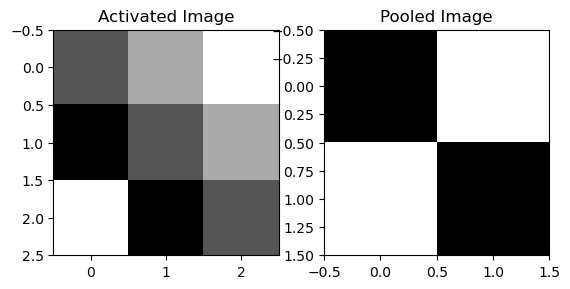

In [64]:
def max_pooling(image, size):
    pooled_image = image[::size, ::size]
    return pooled_image

# Apply max pooling
pooled_image = max_pooling(activated_image, 2)

# Visualizing the pooling
plt.subplot(1, 2, 1)
plt.title("Activated Image")
plt.imshow(activated_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Pooled Image")
plt.imshow(pooled_image, cmap='gray')
plt.show()

## 6. Fully Connected Layer
- The fully connected layer takes the flattened output from the previous layers and performs classification.
- The output from the pooling layer is flattened into a one-dimensional array. 
- The flattened output is then fed into one or more fully connected layers.
##### It acts as a classifier, translating the learned features into class scores or predictions.
- After calculating the output, an activation function (like ReLU or Softmax) is typically applied to introduce non-linearity and help with classification tasks.

In [66]:
# Flattening the pooled image
flattened = pooled_image.flatten()

# Example weights and bias for a simple classification (2 classes)
weights = np.random.rand(flattened.shape[0], 2)
bias = np.random.rand(2)

# Forward pass through the fully connected layer
logits = np.dot(flattened, weights) + bias

# Applying softmax to get probabilities
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))  # Stability improvement
    return exp_logits / exp_logits.sum(axis=0)

probabilities = softmax(logits)

# Predict the class
predictions = np.argmax(probabilities)

print(f"Predicted class: {predictions}")
print(f"Class probabilities: {probabilities}")


Predicted class: 1
Class probabilities: [0.01682363 0.98317637]


## 7. Conclusion:
- Through this structured flow—from input to output—CNNs effectively learn hierarchical features, making them exceptional for tasks like image recognition and object detection. 
- Their architecture, combining convolution, activation, pooling, and fully connected layers, empowers machines to understand visual data with remarkable accuracy.

## Task 1: Build a Simple CNN for Image Classification
#### Objective: Create a CNN to classify images from a dataset (e.g., MNIST or CIFAR-10).

##### Steps:
- Load the dataset using a library like TensorFlow or PyTorch.
- Preprocess the images (resize, normalize).
- Define a simple CNN architecture with:
--- Convolutional layers
--- Activation functions (ReLU)
--- Max pooling layers
--- A fully connected layer
- Compile the model and train it on the dataset.
- Evaluate the model's performance on a test set.

## Task 2: Visualize Feature Maps
#### Objective: Visualize the feature maps produced by different layers of a CNN.
###### Steps:
- Load a pre-trained CNN (e.g., VGG16 or ResNet).
- Select an input image and preprocess it.
- Create a model to output feature maps at specific layers.
- Pass the input image through the model to get the feature maps.
- Use matplotlib to visualize the feature maps at each selected layer.

### Task 3: Experiment with Hyperparameters
##### Objective: Analyze how changing hyperparameters affects model performance.

##### Steps:
- Build a CNN for a specific dataset.
- Train the model with default hyperparameters (learning rate, batch size, number of epochs).
- Change one hyperparameter at a time (e.g., increase the number of filters, change the learning rate) and retrain the model.
- Compare the accuracy and loss for each configuration.
- Document your findings on how each hyperparameter impacted performance.